In [1]:
#  1. Importing necessary libraries

import pandas as pd       # For handling data in tables
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt       # For making plots
import seaborn as sns                 # For more visually appealing plots


In [5]:
# 2 Load and Explore Data

# Load dataset
data = pd.read_csv("C:\\Users\\ibora\\Downloads\\diabetes_prediction_dataset - diabetes_prediction_dataset.csv") 

# Look at the first few rows
data.head(3)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [7]:
# Look at the last few rows
data.tail(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [9]:
# 3 Data Understanding/ Cleaning

data.shape

(100000, 9)

In [11]:
# General dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Observation
The dataset contains 100, 000 rows with 9 columns having 3 data type float, 4 integers and 2 objects

In [14]:
# Statistical summary of the numerical columns in a dataset.

data.describe ()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Observations
1. Class Imbalance:
The target variable diabetes has a mean of 0.085, indicating that only 8.5% of the samples are diabetic (class 1), while 91.5% are non-diabetic (class 0). This is a highly imbalanced dataset.

2. Age Distribution:
The mean age is 41.89, with a wide range from 0.08 to 80 years. The 25th percentile is 24, and the 75th percentile is 60, indicating a diverse age group.

3. Hypertension and Heart Disease:
7.5% of individuals have hypertension (hypertension mean = 0.07485).
3.9% of individuals have heart disease (heart_disease mean = 0.03942).

4. BMI and Health Metrics:
The mean BMI is 27.32, with a wide range from 10.01 to 95.69, indicating some extreme outliers.
The mean HbA1c level is 5.53, and the mean blood glucose level is 138.06, both within typical ranges but with significant variability.

5. Outliers:
Some features (e.g., bmi, blood_glucose_level) have extreme values (e.g., bmi max = 95.69, blood_glucose_level max = 300), which may need to be addressed during preprocessing( (e.g., scaling or transformation) to improve model performance).

In [17]:
# check for missing value
data.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [19]:
# Check for missing values
data.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

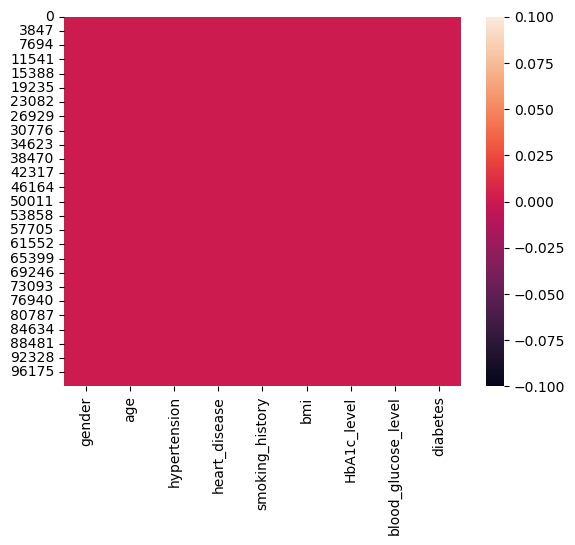

In [21]:
sns.heatmap(data.isnull())

### Observation
No missing value

In [25]:
# checking for duplicated value
data.duplicated().sum()

3854

In [27]:
data[data.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


### Observation
This dataset has 3,854 duplicated records.

In [30]:
data.drop_duplicates (inplace=True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Observation
After dropping the duplicates, the sum of the dataset is now 96,146 rows against the original total of 100,000.

In [33]:
data.shape

(96146, 9)

In [35]:
data.duplicated().sum()

0

In [38]:
# Check for Inconsistent Data:Inspect categorical columns for inconsistent values (e.g., typos or unexpected categories).
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [40]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
Categorical Columns: ['gender', 'smoking_history']


In [42]:
# Check unique values in categorical columns

for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in gender: ['Female' 'Male' 'Other']
Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


### Observation
Wrong gender category "Others"

Similar smoking history: fomer, not current, ever

In [46]:
# Reassign "other" in gender category to the mode of that feature (female)
data["gender"] = data["gender"].replace("Other", "Female")

In [48]:
# Group "former", "not current" and "ever" into a single category called "past_smoker"
data["smoking_history"] = data["smoking_history"].replace({"former":"past_smoker",
                                                           "not current": "past_smoker",
                                                          "ever": "past_smoker"})

In [50]:
# Check unique values in categorical columns

for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in gender: ['Female' 'Male']
Unique values in smoking_history: ['never' 'No Info' 'current' 'past_smoker']


In [66]:
# Save final data
import os

# Define the directory path
directory_path = os.path.expanduser("~/Documents/data")

# Check if the directory exists, if not, create it
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Save final data
file_path = os.path.join(directory_path, "Clean_data.csv")
data.to_csv(file_path, index=False)

